<a href="https://colab.research.google.com/github/harshatejapullagura/30daysofcode/blob/main/Total_business_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:

import pandas as pd          
import numpy as np  
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series  

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
df=pd.read_csv("/ftbs.csv")
df.head()

,DATE,TOTBUSSMA
0,1/1/1992,517626
1,2/1/1992,520289
2,3/1/1992,530715
3,4/1/1992,533290
4,5/1/1992,536742


In [9]:
train=df[:253]
test=df[253:]

In [10]:
train_original=train.copy() 
test_original=test.copy()

In [11]:
train.columns

Index(['DATE', 'TOTBUSSMA'], dtype='object')

In [12]:
train.dtypes

DATE         object
TOTBUSSMA     int64
dtype: object

In [13]:
train.shape

(253, 2)

In [14]:
test.shape

(84, 2)

In [15]:
train['Datetime'] = pd.to_datetime(train.loc[:,'DATE'],format='%m/%d/%Y') 
test['Datetime'] = pd.to_datetime(test.loc[:,'DATE'],format='%m/%d/%Y') 
test_original['Datetime'] = pd.to_datetime(test_original.loc[:,"DATE"],format='%m/%d/%Y') 
train_original['Datetime'] = pd.to_datetime(train_original.loc[:,"DATE"],format='%m/%d/%Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
def applyer(row):
    if row.month == 1 or row.month == 2 or row.month==3:
        return 1
    elif row.month == 4 or row.month == 5 or row.month==6:
        return 2
    if row.month == 7 or row.month == 8 or row.month==9:
        return 3
    else:
        return 4 
temp2 = train['Datetime'].apply(applyer) 
train['quarter']=temp2
temp2 = test['Datetime'].apply(applyer) 
test['quarter']=temp2
temp2 = train_original['Datetime'].apply(applyer) 
train_original['quarter']=temp2
temp2 = test_original['Datetime'].apply(applyer) 
test_original['quarter']=temp2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [18]:
train.index = train['Datetime']
train.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2012-04-01', '2012-05-01', '2012-06-01', '2012-07-01',
               '2012-08-01', '2012-09-01', '2012-10-01', '2012-11-01',
               '2012-12-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Datetime', length=253, freq=None)

In [19]:
train.head()

,DATE,TOTBUSSMA,Datetime,year,month,quarter
Datetime,,,,,,
1992-01-01,1/1/1992,517626,1992-01-01,1992,1,1
1992-02-01,2/1/1992,520289,1992-02-01,1992,2,1
1992-03-01,3/1/1992,530715,1992-03-01,1992,3,1
1992-04-01,4/1/1992,533290,1992-04-01,1992,4,2
1992-05-01,5/1/1992,536742,1992-05-01,1992,5,2


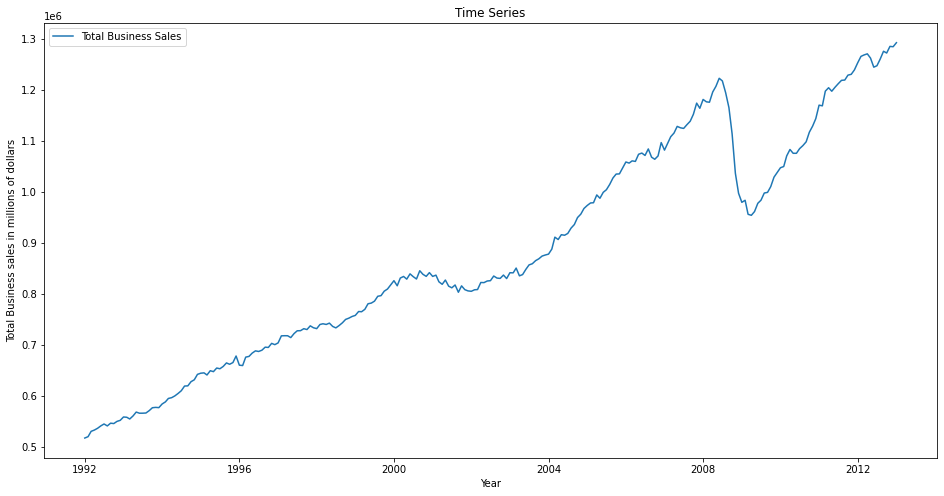

In [20]:
ts=train['TOTBUSSMA']
%matplotlib inline  
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Total Business Sales') 
plt.title('Time Series') 
plt.xlabel("Year") 
plt.ylabel("Total Business sales in millions of dollars") 
plt.legend(loc='best')

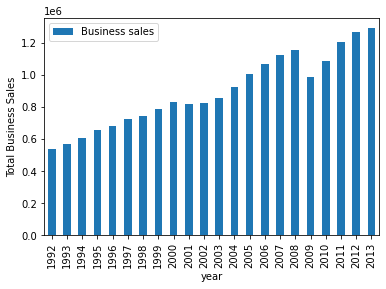

In [21]:
train.groupby('year')['TOTBUSSMA'].mean().plot.bar()
plt.ylabel('Total Business Sales')
plt.legend(['Business sales'])

Text(0, 0.5, 'Total Business Sales')

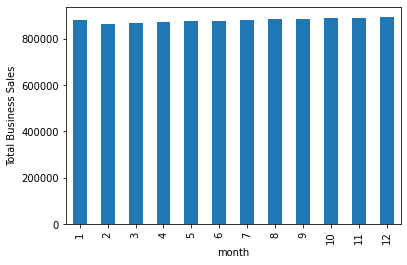

In [22]:
train.groupby('month')['TOTBUSSMA'].mean().plot.bar()
plt.ylabel('Total Business Sales')
#plt.legend(['Business sales'])

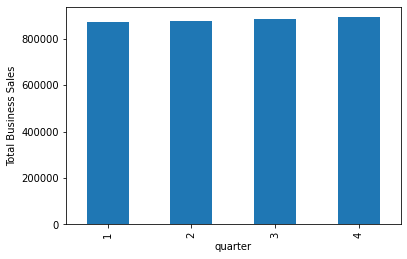

In [23]:
train.groupby('quarter')['TOTBUSSMA'].mean().plot.bar()
plt.ylabel('Total Business Sales')
#plt.legend(['Business sales'])
plt.savefig('Data quarter wise.png')

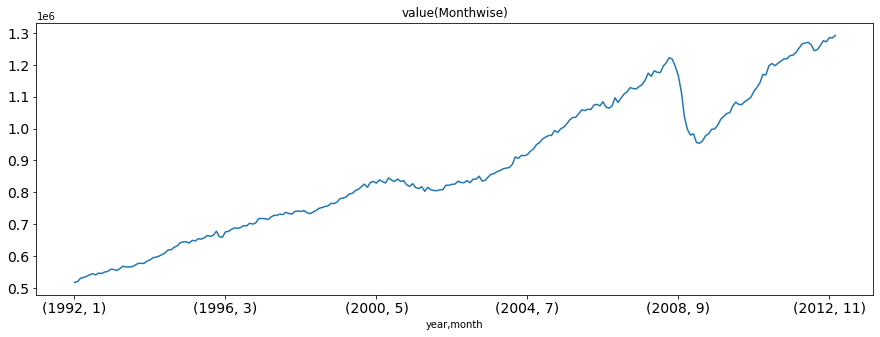

In [24]:
temp=train.groupby(['year', 'month'])['TOTBUSSMA'].mean() 
temp.plot(figsize=(15,5), title= 'value(Monthwise)', fontsize=14)

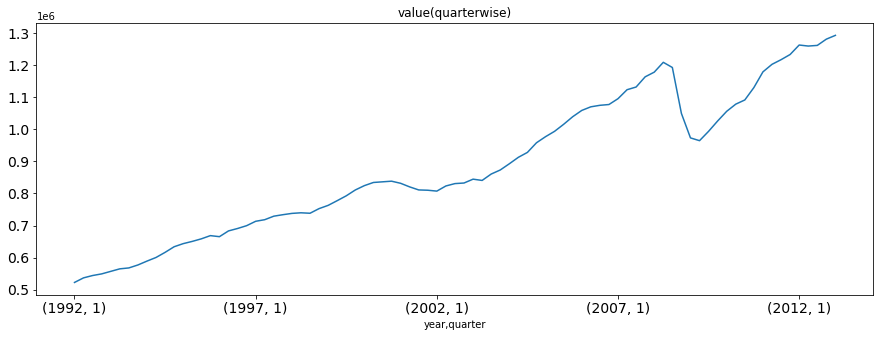

In [25]:
temp=train.groupby(['year', 'quarter'])['TOTBUSSMA'].mean() 
temp.plot(figsize=(15,5), title= 'value(quarterwise)', fontsize=14)

In [26]:
yearly = train.resample('Y').mean() 
monthly = train.resample('M').mean()

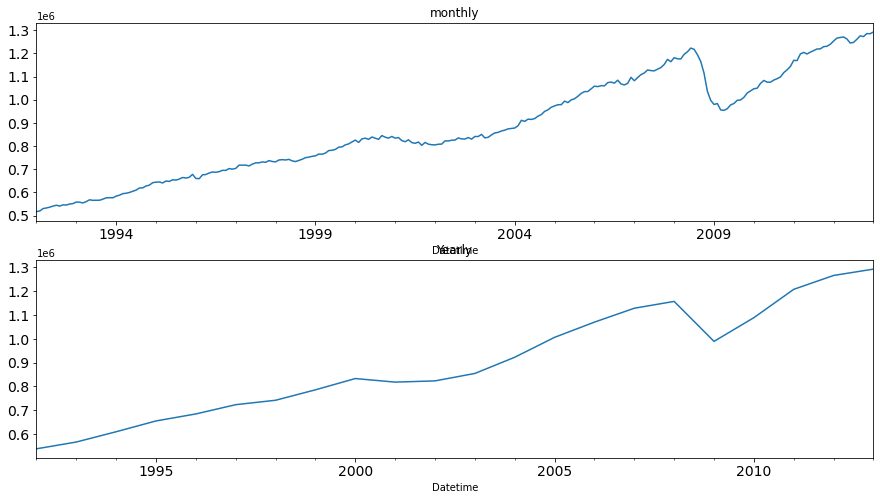

In [27]:
fig, axs = plt.subplots(2,1) 
monthly.TOTBUSSMA.plot(figsize=(15,8), title= 'monthly', fontsize=14, ax=axs[0]) 
yearly.TOTBUSSMA.plot(figsize=(15,8), title= 'Yearly', fontsize=14, ax=axs[1])

In [28]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%m/%d/%Y') 
test.index = test.Timestamp  

# Converting to monthly mean 
test = test.resample('M').mean() 

train.Timestamp = pd.to_datetime(train.Datetime,format='%m/%d/%Y') 
train.index = train.Timestamp 
train = train.resample('M').mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


In [29]:
train.head()

,TOTBUSSMA,year,month,quarter
Datetime,,,,
1992-01-31,517626.0,1992.0,1.0,1.0
1992-02-29,520289.0,1992.0,2.0,1.0
1992-03-31,530715.0,1992.0,3.0,1.0
1992-04-30,533290.0,1992.0,4.0,2.0
1992-05-31,536742.0,1992.0,5.0,2.0


In [30]:
from sklearn.metrics import mean_squared_error 
from math import sqrt 

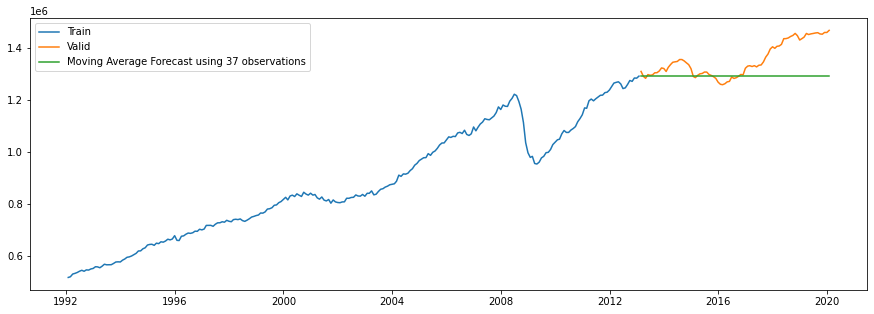

In [31]:
y_hat_avg = test.copy() 
y_hat_avg['moving_avg_forecast'] = train['TOTBUSSMA'].rolling(1).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(train['TOTBUSSMA'], label='Train') 
plt.plot(test['TOTBUSSMA'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 37 observations') 
plt.legend(loc='best') 
plt.show()

In [32]:
rms = sqrt(mean_squared_error(test.TOTBUSSMA, y_hat_avg.moving_avg_forecast)) 
print(rms)

89144.42641331832


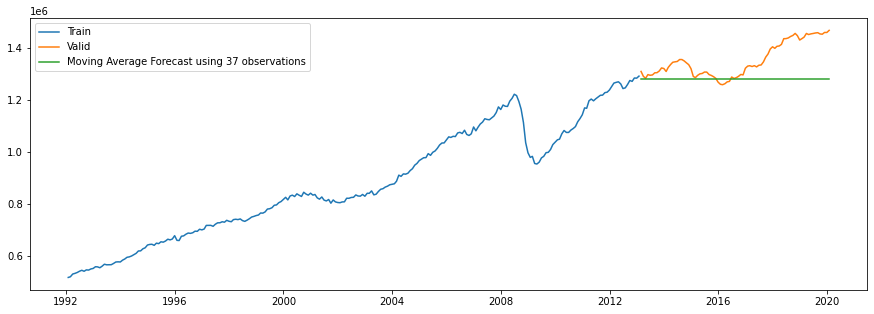

In [33]:
y_hat_avg = test.copy() 
y_hat_avg['moving_avg_forecast'] = train['TOTBUSSMA'].rolling(5).mean().iloc[-1] # average of last 50 observations. 
plt.figure(figsize=(15,5)) 
plt.plot(train['TOTBUSSMA'], label='Train') 
plt.plot(test['TOTBUSSMA'], label='Valid') 
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 37 observations') 
plt.legend(loc='best') 
plt.show()

In [34]:
rms = sqrt(mean_squared_error(test.TOTBUSSMA, y_hat_avg.moving_avg_forecast)) 
print(rms)

96541.22016295874


In [35]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


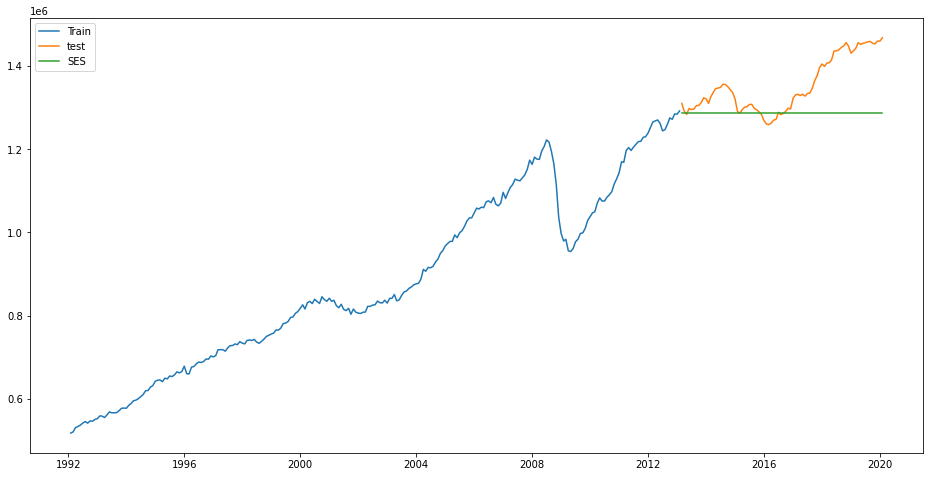

In [36]:
y_hat_avg = test.copy() 
fit2 = SimpleExpSmoothing(np.asarray(train['TOTBUSSMA'])).fit(smoothing_level=0.5,optimized=False) 
y_hat_avg['SES'] = fit2.forecast(len(test)) 
plt.figure(figsize=(16,8)) 
plt.plot(train['TOTBUSSMA'], label='Train') 
plt.plot(test['TOTBUSSMA'], label='test') 
plt.plot(y_hat_avg['SES'], label='SES') 
plt.legend(loc='best') 
#plt.savefig("Simple Exponential Smoothing.png", bbox_inches='tight')
plt.show()

In [37]:
rms = sqrt(mean_squared_error(test.TOTBUSSMA, y_hat_avg.SES)) 
print(rms)

93200.18163723568


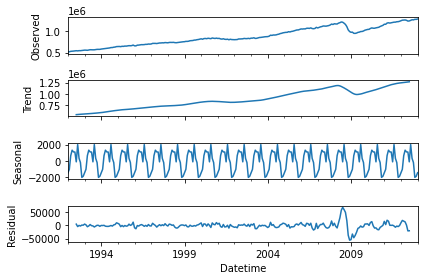

In [38]:
import statsmodels.api as sm 
sm.tsa.seasonal_decompose(train.TOTBUSSMA).plot() 
result = sm.tsa.stattools.adfuller(train.TOTBUSSMA) 
plt.show()

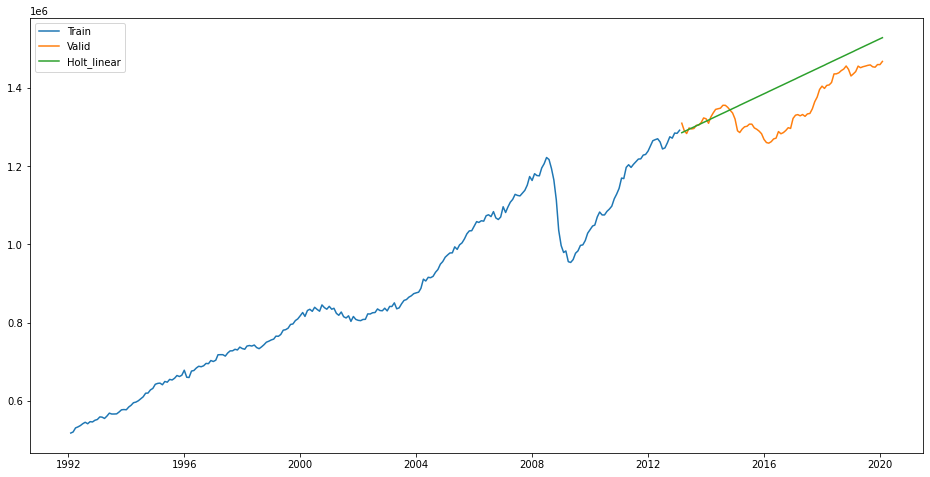

In [39]:
y_hat_avg = test.copy() 
fit1 = Holt(np.asarray(train['TOTBUSSMA'])).fit(smoothing_level = 0.2,smoothing_slope = 0.3) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(test)) 
plt.figure(figsize=(16,8)) 
plt.plot(train['TOTBUSSMA'], label='Train') 
plt.plot(test['TOTBUSSMA'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
#plt.savefig("Holt's Linear Model.png", bbox_inches='tight')
plt.show()

In [40]:
rms = sqrt(mean_squared_error(test.TOTBUSSMA, y_hat_avg.Holt_linear)) 
print(rms)

70748.72481341331


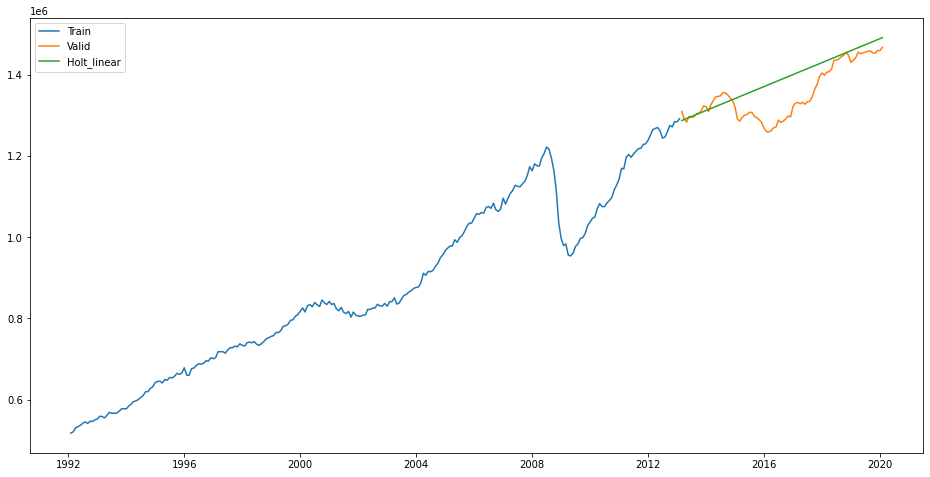

In [41]:
y_hat_avg = test.copy() 
fit1 = Holt(np.asarray(train['TOTBUSSMA'])).fit(smoothing_level = 0.2,smoothing_slope = 0.2) 
y_hat_avg['Holt_linear'] = fit1.forecast(len(test)) 
plt.figure(figsize=(16,8)) 
plt.plot(train['TOTBUSSMA'], label='Train') 
plt.plot(test['TOTBUSSMA'], label='Valid') 
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
#plt.savefig("Holt's Linear Model.png", bbox_inches='tight')
plt.show()

In [42]:
rms = sqrt(mean_squared_error(test.TOTBUSSMA, y_hat_avg.Holt_linear)) 
print(rms)

55386.22164094275


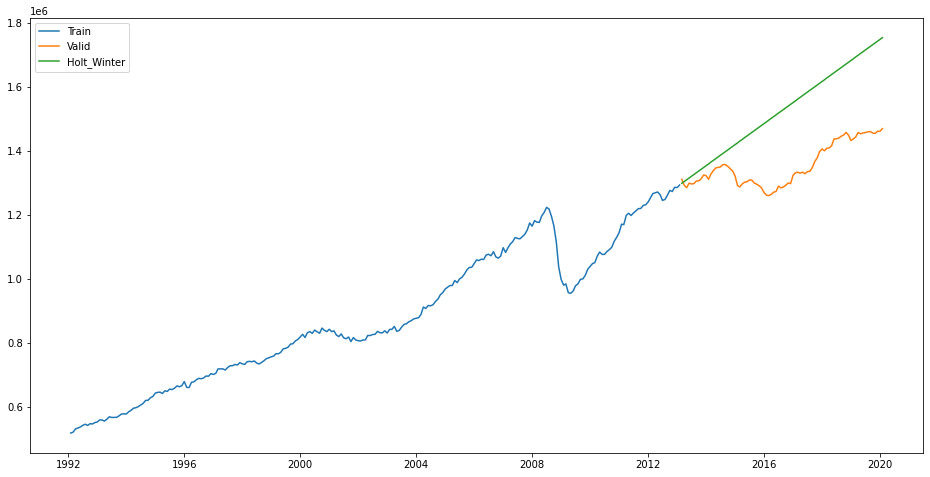

In [43]:
y_hat_avg = test.copy() 
fit1 = ExponentialSmoothing(np.asarray(train['TOTBUSSMA']) ,seasonal_periods=4 ,trend='add').fit() 
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test)) 
plt.figure(figsize=(16,8)) 
plt.plot( train['TOTBUSSMA'], label='Train') 
plt.plot(test['TOTBUSSMA'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
#plt.savefig("Holt's Winter Model.png", bbox_inches='tight')
plt.show()

In [44]:
rms = sqrt(mean_squared_error(test.TOTBUSSMA, y_hat_avg.Holt_Winter)) 
print(rms)

194812.02246117927


In [45]:
from statsmodels.tsa.stattools import adfuller 
def test_stationarity(timeseries):
        #Determing rolling statistics
    rolmean = timeseries.rolling(window=4).mean() #4 quarters
    rolstd = timeseries.rolling(window=4).std()
        #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
        #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


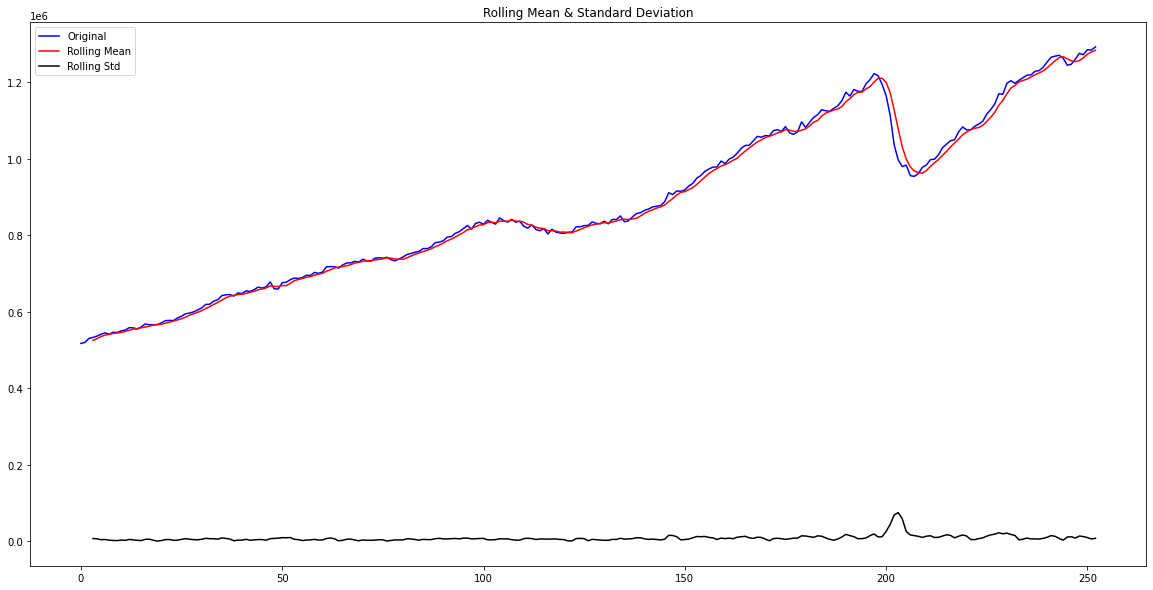

Results of Dickey-Fuller Test:
Test Statistic                  -0.514483
p-value                          0.889159
#Lags Used                       3.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [46]:
from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
test_stationarity(train_original['TOTBUSSMA'])

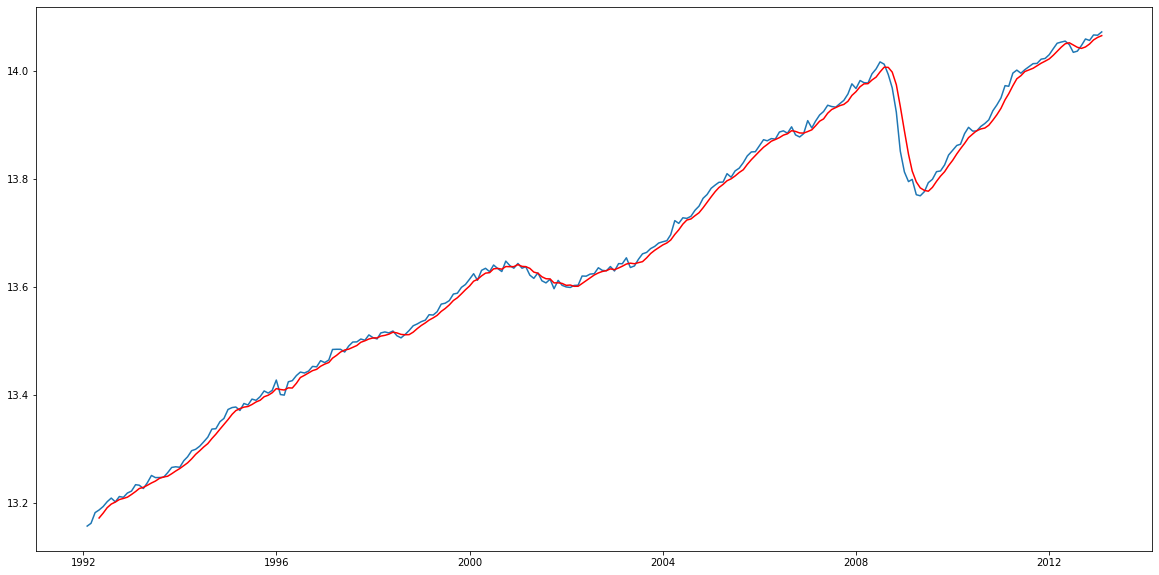

In [47]:
train_log = np.log(train['TOTBUSSMA']) 
test_log = np.log(test['TOTBUSSMA'])
moving_avg = train_log.rolling(4).mean() 
plt.plot(train_log) 
plt.plot(moving_avg, color = 'red') 
plt.show()

In [48]:
train_log_moving_avg_diff = train_log - moving_avg

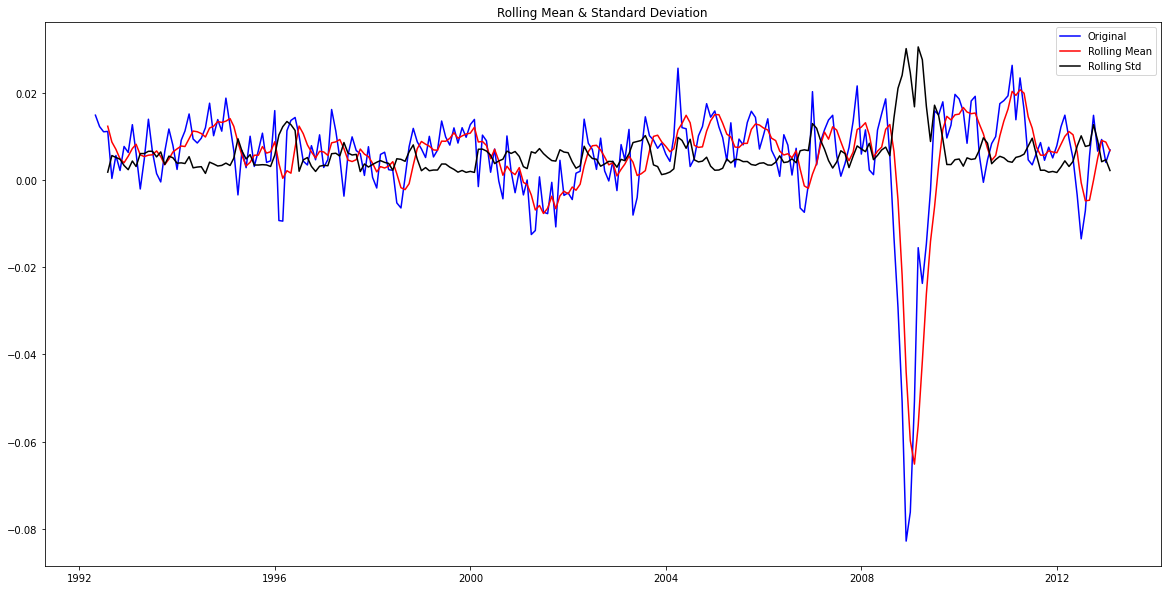

Results of Dickey-Fuller Test:
Test Statistic                  -5.585067
p-value                          0.000001
#Lags Used                       0.000000
Number of Observations Used    249.000000
Critical Value (1%)             -3.456888
Critical Value (5%)             -2.873219
Critical Value (10%)            -2.572994
dtype: float64


In [49]:
train_log_moving_avg_diff.dropna(inplace = True) 
test_stationarity(train_log_moving_avg_diff)

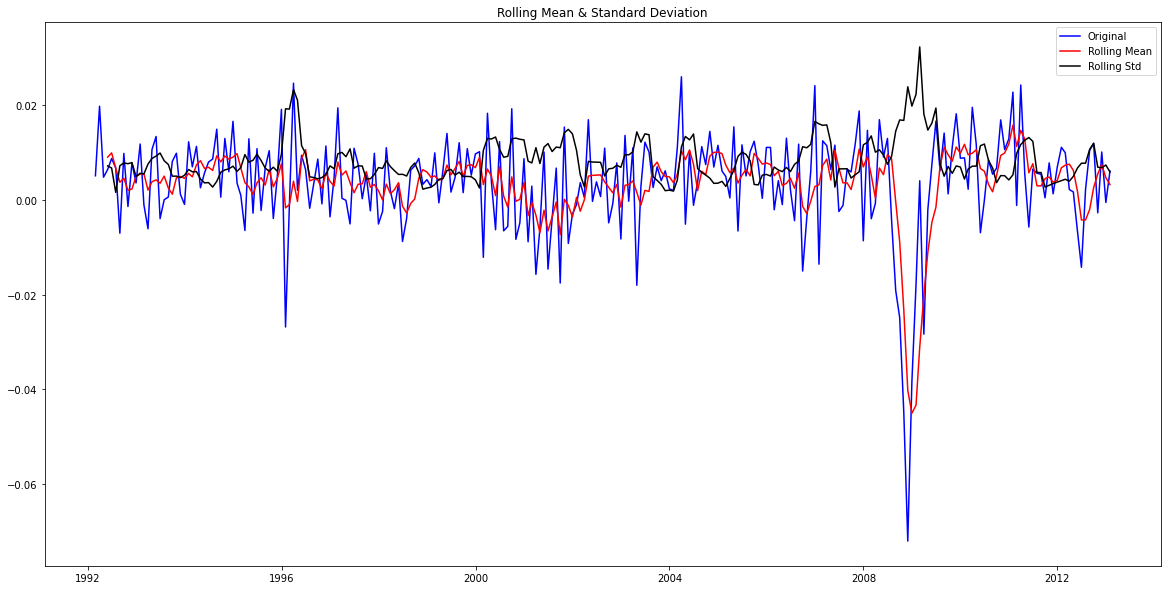

Results of Dickey-Fuller Test:
Test Statistic                -5.735098e+00
p-value                        6.465726e-07
#Lags Used                     2.000000e+00
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


In [50]:
train_log_diff = train_log - train_log.shift(1) 
test_stationarity(train_log_diff.dropna())

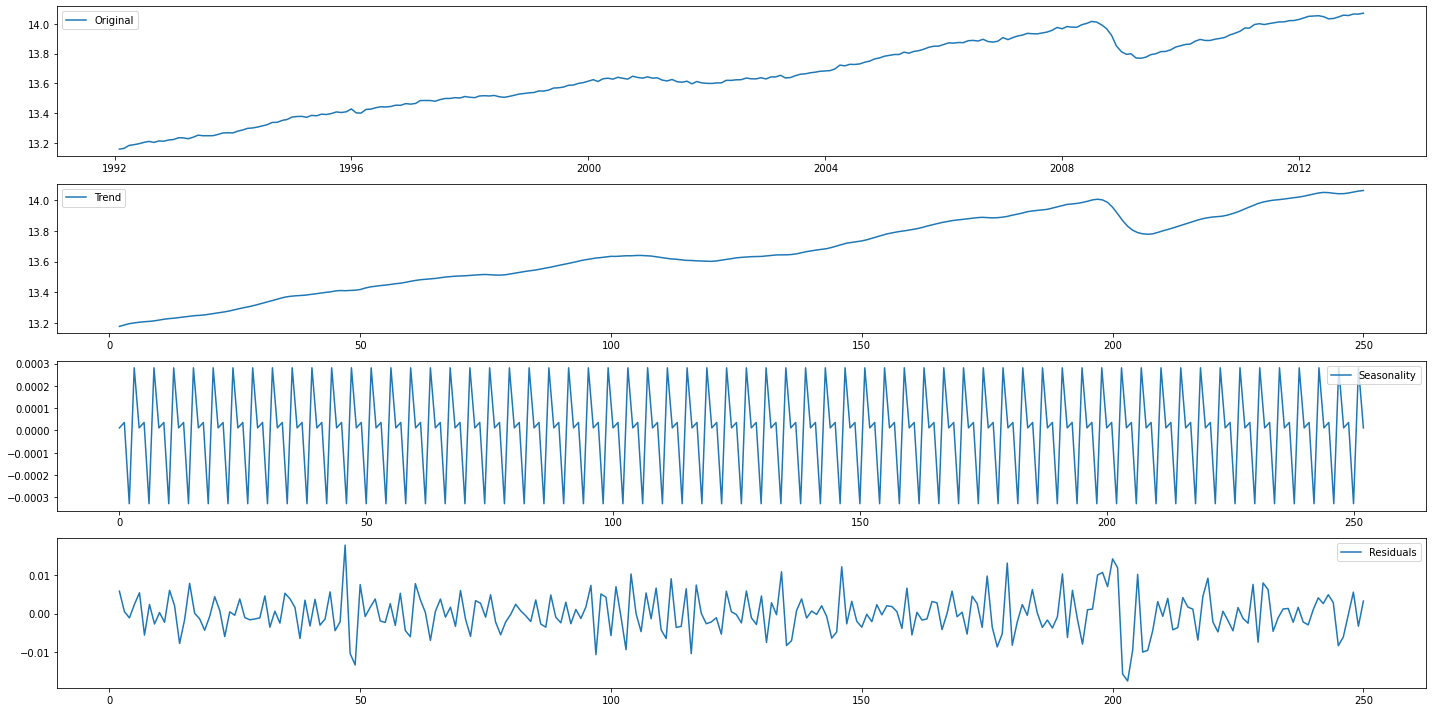

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition = seasonal_decompose(pd.DataFrame(train_log).TOTBUSSMA.values, freq = 4) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

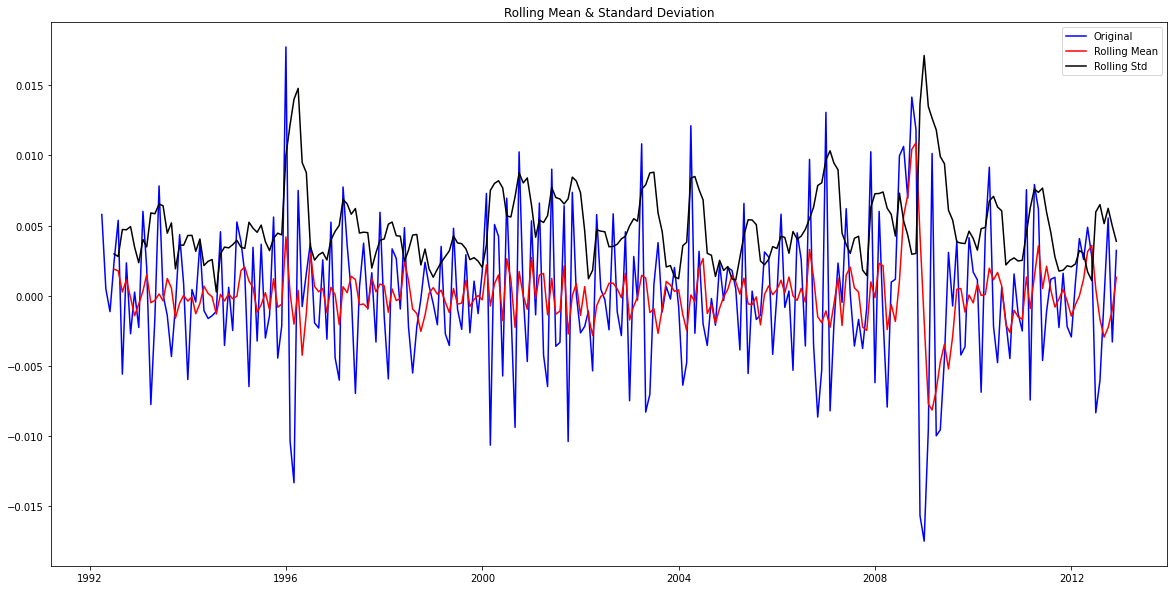

Results of Dickey-Fuller Test:
Test Statistic                -6.556105e+00
p-value                        8.608773e-09
#Lags Used                     1.300000e+01
Number of Observations Used    2.350000e+02
Critical Value (1%)           -3.458487e+00
Critical Value (5%)           -2.873919e+00
Critical Value (10%)          -2.573367e+00
dtype: float64


In [52]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 
test_stationarity(train_log_decompose[0])

In [53]:
from statsmodels.tsa.stattools import acf, pacf 
lag_acf = acf(train_log_diff.dropna(), nlags=50) 
lag_pacf = pacf(train_log_diff.dropna(), nlags=50, method='ols')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


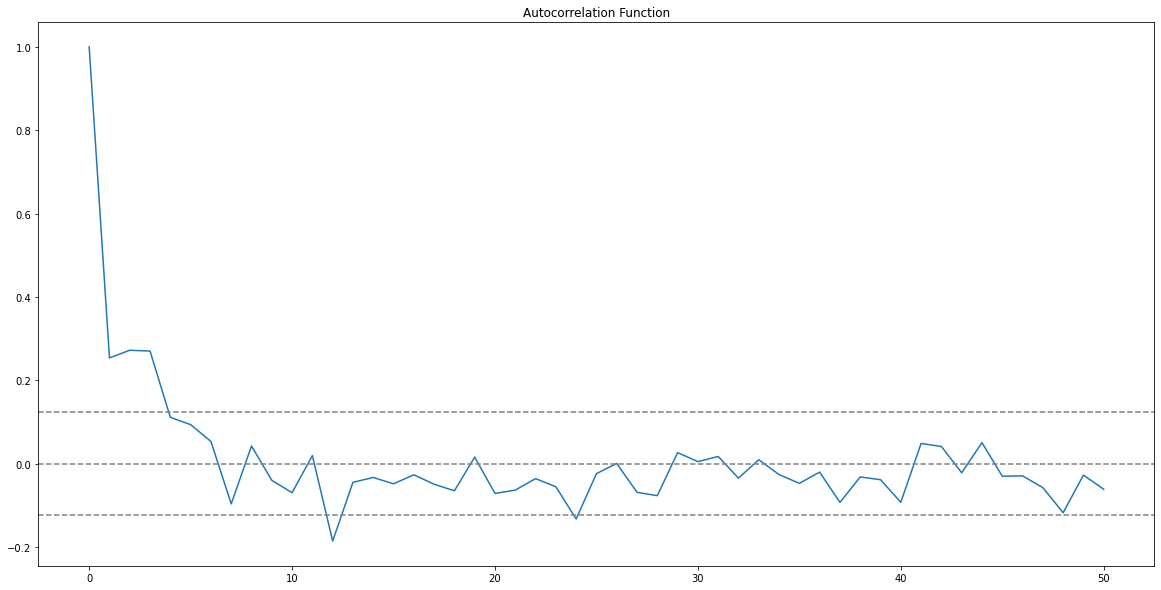

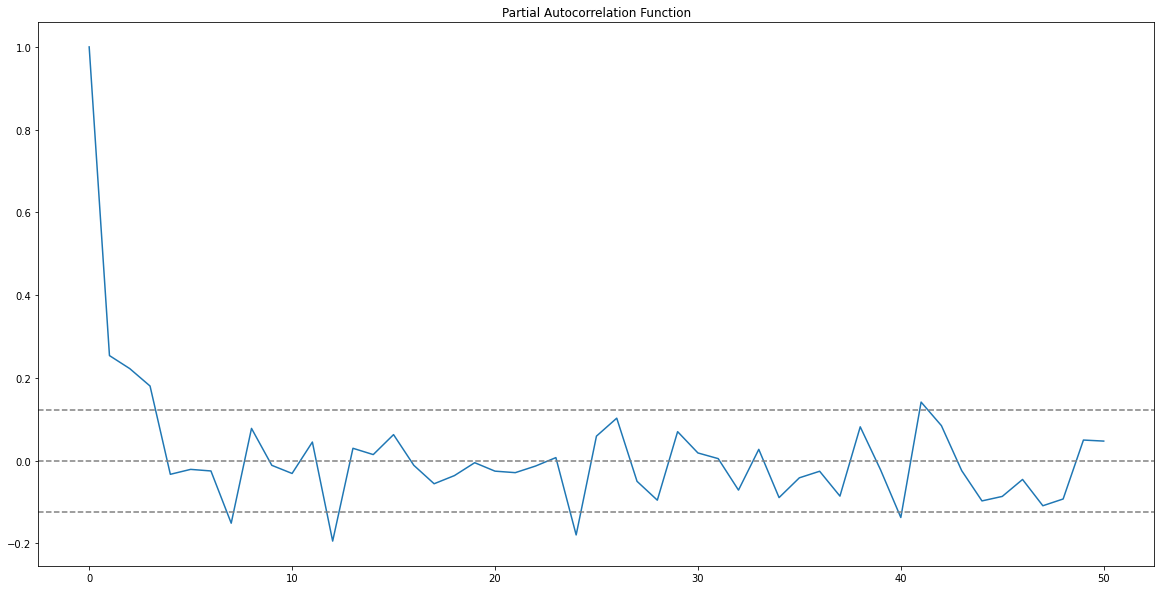

In [54]:
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
#plt.savefig("ACF.png", bbox_inches='tight')
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
#plt.savefig("PACF.png", bbox_inches='tight')
plt.show()

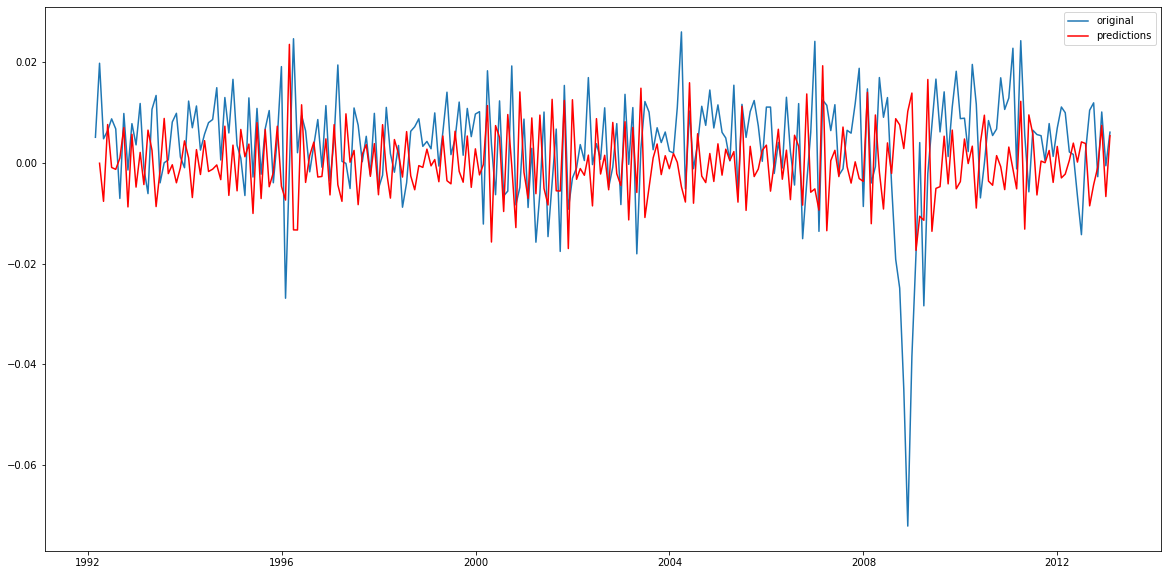

In [55]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_log, order=(1, 2, 0))  # here the q value is zero since it is just the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

In [56]:
test

,TOTBUSSMA,year,month,quarter
Datetime,,,,
2013-02-28,1310292.0,2013.0,2.0,1.0
2013-03-31,1291463.0,2013.0,3.0,1.0
2013-04-30,1283874.0,2013.0,4.0,2.0
2013-05-31,1298134.0,2013.0,5.0,2.0
2013-06-30,1295599.0,2013.0,6.0,2.0
...,...,...,...,...
2019-09-30,1454669.0,2019.0,9.0,3.0
2019-10-31,1453569.0,2019.0,10.0,4.0
2019-11-30,1460383.0,2019.0,11.0,4.0


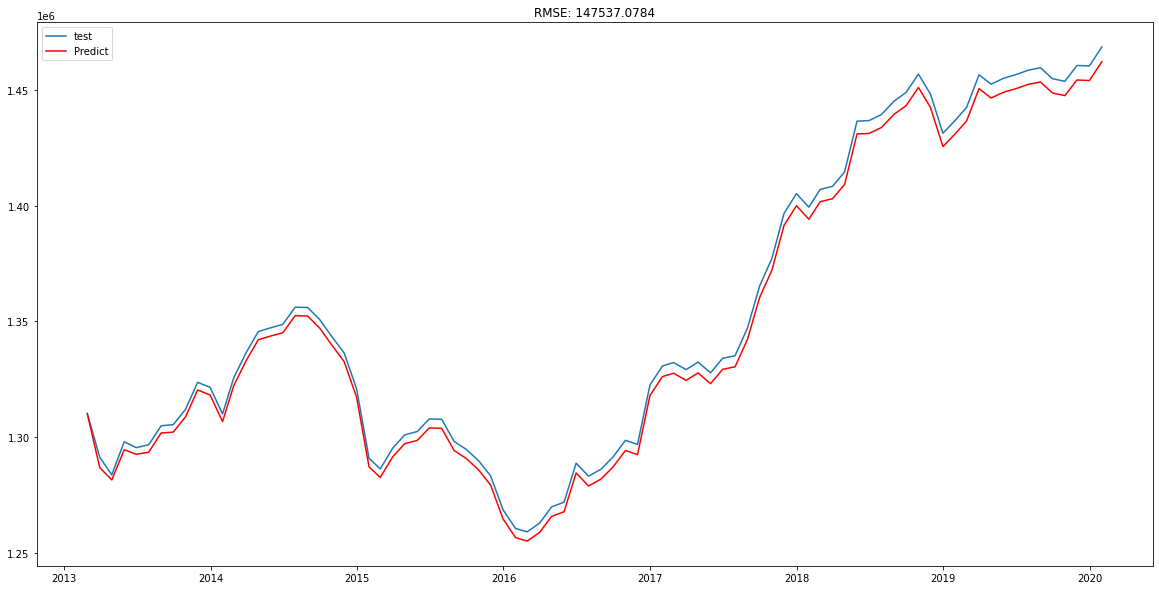

In [57]:
AR_predict=results_AR.predict(start='2013-02-28',end='2020-01-31') 
AR_predict=AR_predict.cumsum().shift().fillna(0) 
AR_predict1=pd.Series(np.ones(test.shape[0]) * np.log(test['TOTBUSSMA']), index = test.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)
plt.plot(test['TOTBUSSMA'], label = "test") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, test['TOTBUSSMA']))/test.shape[0])) 
plt.show()

In [58]:
rms = sqrt(mean_squared_error(test.TOTBUSSMA, AR_predict)) 
print(rms)

4607.844182876253


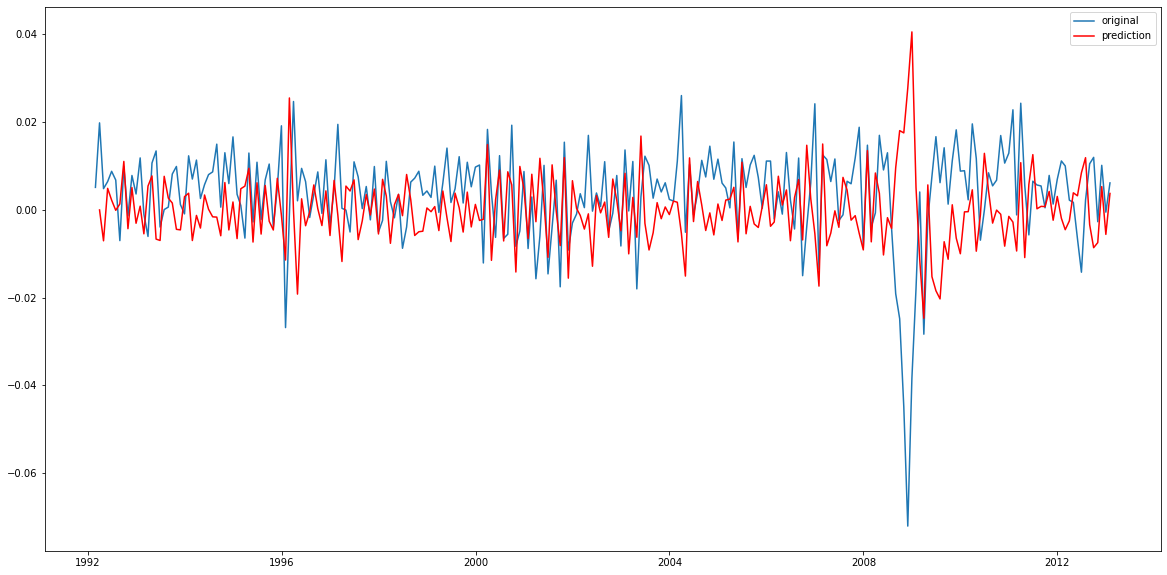

In [59]:
model = ARIMA(train_log, order=(0, 2, 1))  # here the p value is zero since it is just the MA model 
results_MA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_MA.fittedvalues, color='red', label='prediction') 
plt.legend(loc='best') 
plt.show()

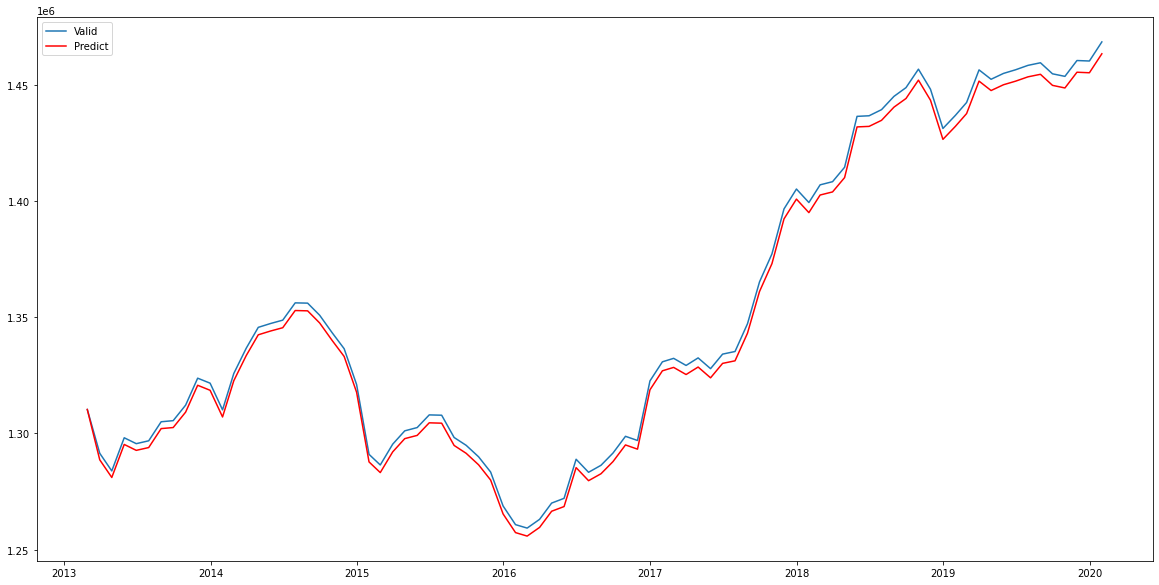

In [60]:
MA_predict=results_MA.predict(start='2013-02-28',end='2020-01-31') 
MA_predict=MA_predict.cumsum().shift().fillna(0) 
MA_predict1=pd.Series(np.ones(test.shape[0]) * np.log(test['TOTBUSSMA']), index =test.index) 
MA_predict1=MA_predict1.add(MA_predict,fill_value=0) 
MA_predict = np.exp(MA_predict1)
plt.plot(test['TOTBUSSMA'], label = "Valid") 
plt.plot(MA_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
#plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['TOTBUSSMA']))/valid.shape[0])) 
plt.show()

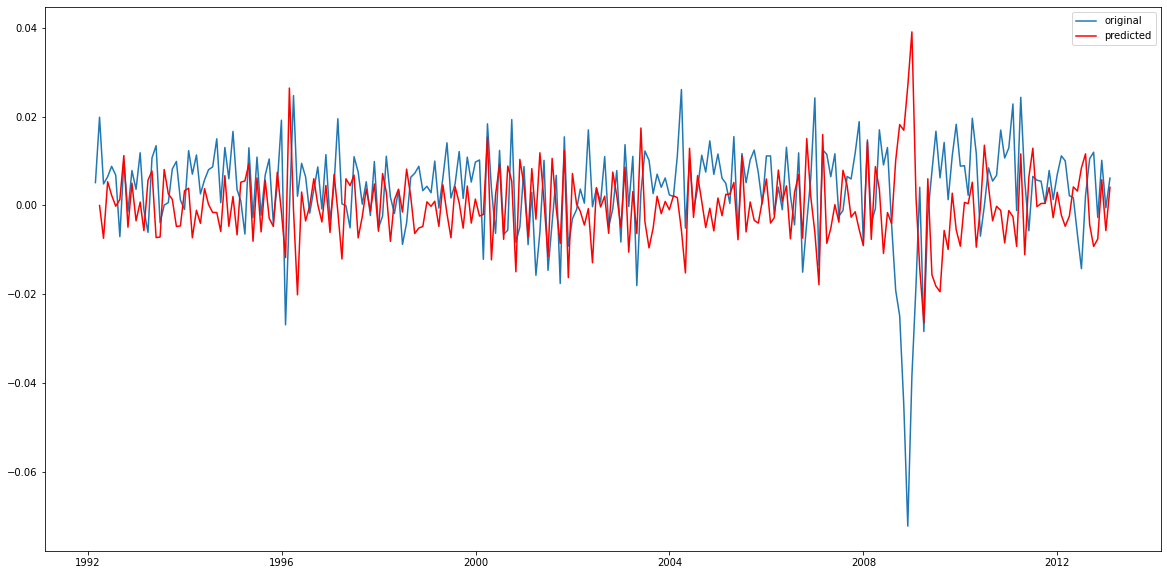

In [61]:
model = ARIMA(train_log, order=(1, 2, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()

In [62]:
def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['TOTBUSSMA']), index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['TOTBUSSMA'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['TOTBUSSMA']))/given_set.shape[0]))
    #plt.title(sqrt(mean_squared_error(given_set.TOTBUSSMA, predict)))
    plt.savefig("ARIMA model for validation data.png", bbox_inches='tight')
    plt.show()
    
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
 
    plt.plot(given_set['TOTBUSSMA'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (sqrt(mean_squared_error(predict, given_set['TOTBUSSMA']))))
    plt.show()

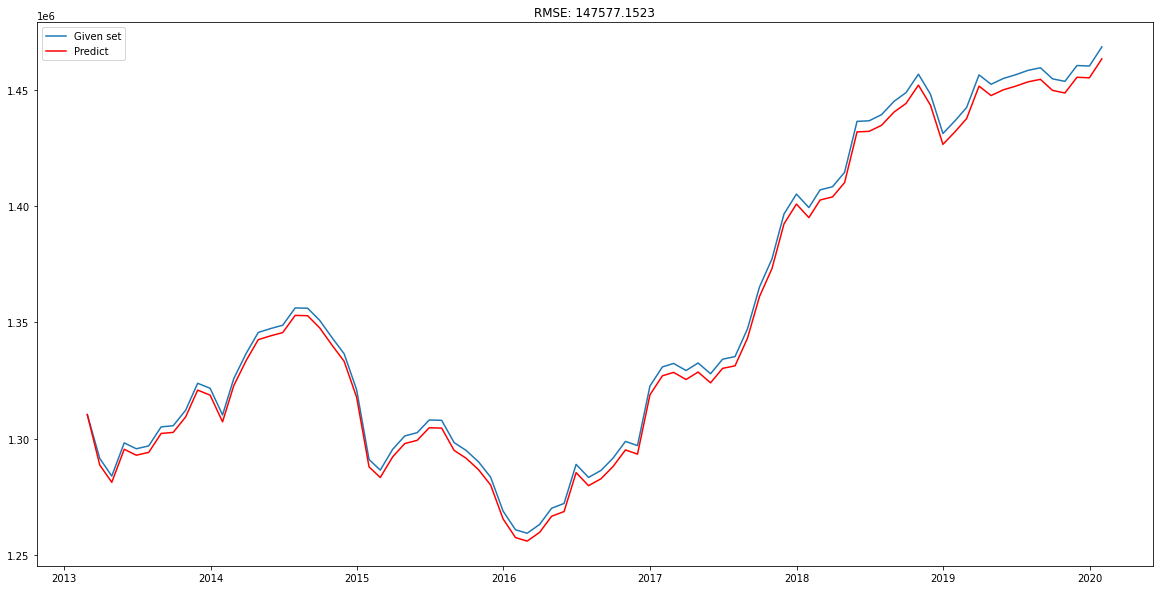

In [63]:
ARIMA_predict_diff=results_ARIMA.predict(start='2013-02-28',end='2020-01-31')
check_prediction_diff(ARIMA_predict_diff, test)# validation data

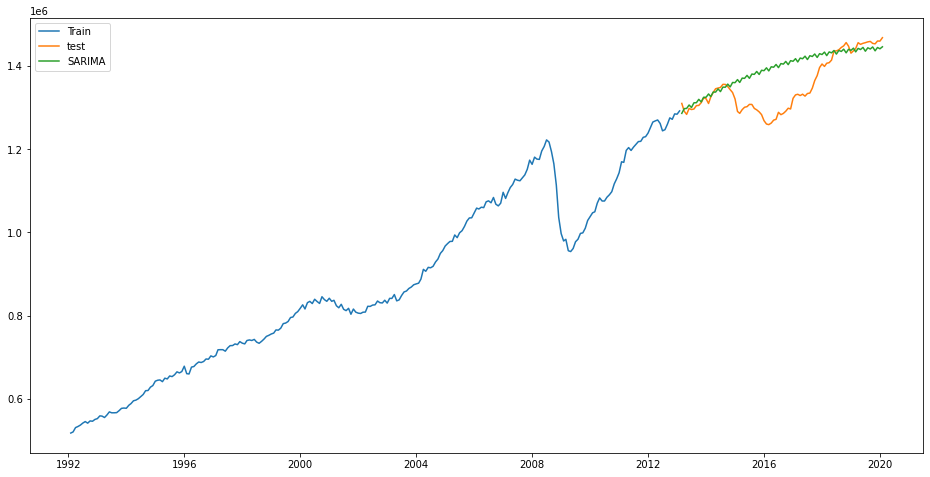

In [64]:
import statsmodels.api as sm
y_hat_avg = test.copy() 
fit1 = sm.tsa.statespace.SARIMAX(train.TOTBUSSMA, order=(1,2,1),seasonal_order=(0,1,1,4)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start='2013-02-28',end='2020-01-31', dynamic=True) 
plt.figure(figsize=(16,8)) 
plt.plot(train['TOTBUSSMA'], label='Train') 
plt.plot(test['TOTBUSSMA'], label='test') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best') 
#plt.savefig("SARIMA Model.png", bbox_inches='tight')
plt.show()

In [65]:
rms = sqrt(mean_squared_error(test.TOTBUSSMA, y_hat_avg.SARIMA)) 
print(rms)

63384.98021676845


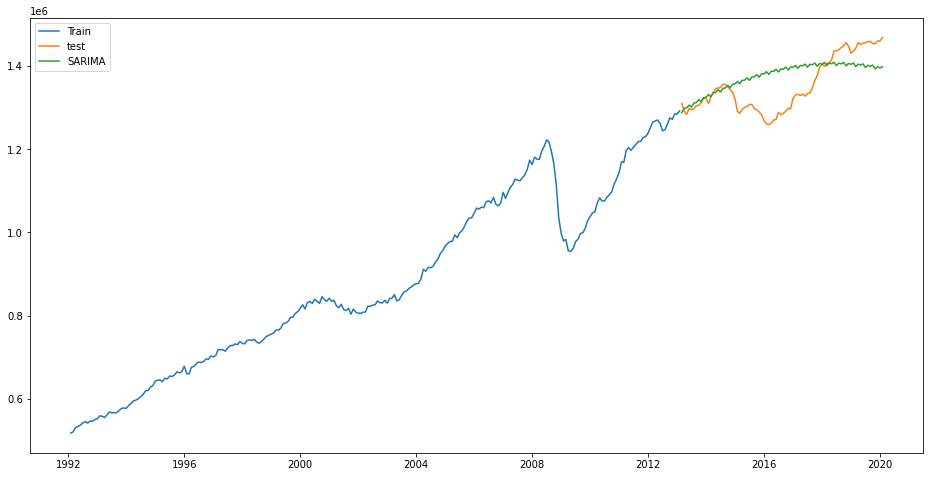

In [66]:
y_hat_avg = test.copy() 
fit1 = sm.tsa.statespace.SARIMAX(train.TOTBUSSMA, order=(1, 2, 1),seasonal_order=(0,1,2,4)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start='2013-02-28',end='2020-01-31', dynamic=True) 
plt.figure(figsize=(16,8)) 
plt.plot(train['TOTBUSSMA'], label='Train') 
plt.plot(test['TOTBUSSMA'], label='test') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best') 
#plt.savefig("SARIMA Model.png", bbox_inches='tight')
plt.show()

In [67]:
rms = sqrt(mean_squared_error(test.TOTBUSSMA, y_hat_avg.SARIMA)) 
print(rms)

60905.795813794335
